<a href="https://colab.research.google.com/github/ankitaattavar/Linear-Regression/blob/main/Linear_Regression_5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
x=df.drop("Chirps/Second", axis='columns')
y=df["Chirps/Second"]
x.head()
y.head()

0    20.0
1    16.0
2    19.8
3    18.4
4    17.1
Name: Chirps/Second, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


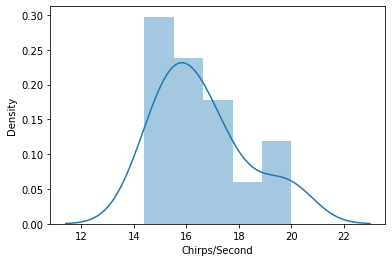

In [ ]:
import seaborn as sns
sns.distplot(df["Chirps/Second"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


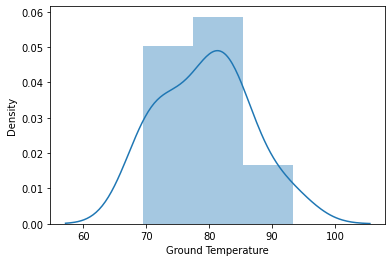

In [ ]:
sns.distplot(df['Ground Temperature'])

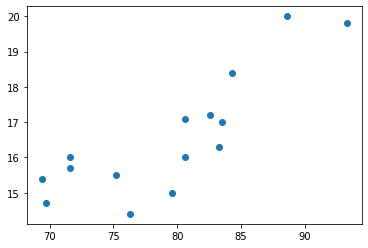

In [ ]:
plt.scatter(x,y)

In [ ]:
x.head()

,Ground Temperature
0,88.6
1,71.6
2,93.3
3,84.3
4,80.6


In [25]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

newarr = arr.reshape(-1, 1)
newarr

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [ ]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# Model Fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [ ]:
#Predicting the test set results
y_pred=lr.predict(x_test)
print(y_pred)

[17.21891123 16.81652876 15.73009607]


In [ ]:
print(y_test)

11    17.2
4     17.1
5     15.5
Name: Chirps/Second, dtype: float64


In [ ]:
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
diff

,Actual value,Predicted value
11,17.2,17.218911
4,17.1,16.816529
5,15.5,15.730096


In [ ]:
# 1.Find the linear regression equation for this data.
print("coffecient",lr.coef_)
print("Intercept",lr.intercept_)
# Linear regression equation is:
# y_pred= 0.690+ 0.20*x_test

coffecient [0.20119124]
Intercept 0.6005148917491159


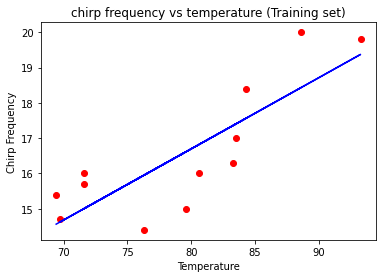

In [ ]:
#2.Chart the original data and the equation on the chart.
#Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('chirp frequency vs temperature (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Chirp Frequency')
plt.show()

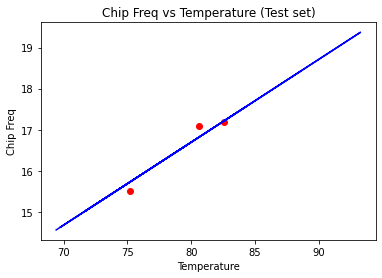

In [ ]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Chip Freq vs Temperature (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Chip Freq')
plt.show()

In [ ]:
#Find the equation's  R2  score 
r_sq= lr.score(x_test,y_test)
print(r_sq)

0.9265616592526871


Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?


In [ ]:
lr.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.7136826])

Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
#Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
(18 - lr.intercept_) / lr.coef_

array([86.48231997])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive 
drive.mount('/content/gdrive')
df1 = pd.read_fwf('gdrive/My Drive/brain_body.txt')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


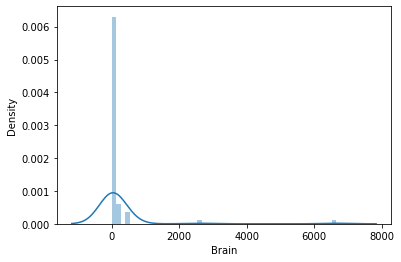

In [4]:
import seaborn as sns
sns.distplot(df1["Brain"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


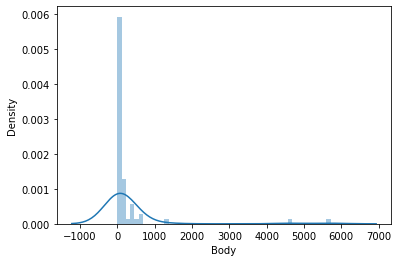

In [5]:
sns.distplot(df1["Body"])

In [6]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [11]:
df2= pd.DataFrame(df1)
df2.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [18]:
import math
x1=np.log2(df2.Brain)
y1=np.log2(df2.Body)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


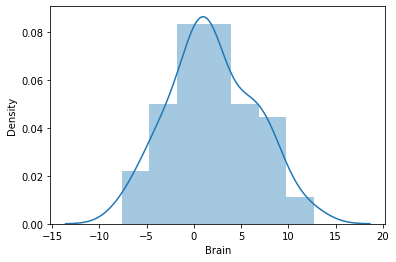

In [19]:
sns.distplot(x1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


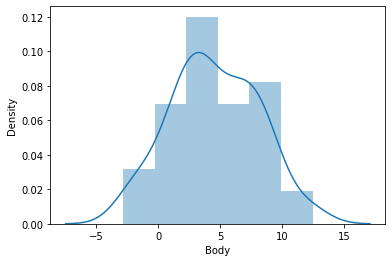

In [20]:
sns.distplot(y1)

In [22]:
# split the training and testing data
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1, test_size=0.2, random_state=2)

In [27]:
#Reshaping
x1_train = x1_train.values.reshape(-1, 1)
x1_test = x1_test.values.reshape(-1, 1)
y1_train = y1_train.values.reshape(-1, 1)
y1_test = y1_test.values.reshape(-1, 1)

In [29]:
# Model Fitting
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression()

In [31]:
#Predicting the test set results
y1_pred=lr1.predict(x1_test)
print(y1_pred)

[[ 4.63520311]
 [ 4.43621499]
 [ 7.62577509]
 [ 8.71392257]
 [ 5.6379688 ]
 [ 2.42019467]
 [ 7.02780385]
 [ 8.99964704]
 [ 1.67119624]
 [12.84960244]
 [ 2.26916748]
 [ 2.76428545]
 [ 3.61865569]]


In [35]:
print(y1_test)

[[ 4.08746284]
 [ 5.47573343]
 [ 6.33985   ]
 [ 7.40087944]
 [ 6.84549005]
 [ 1.26303441]
 [ 5.80735492]
 [ 8.66533592]
 [ 0.92599942]
 [12.47978026]
 [ 3.95419631]
 [ 3.62058641]
 [ 3.51096192]]


In [36]:
# 1.Find the linear regression equation for this data.
print("coffecient",lr1.coef_)
print("Intercept",lr1.intercept_)
# Linear regression equation is:
# y_pred= 3.083+ 0.76*x1_test

coffecient [[0.76898844]]
Intercept [3.08344449]


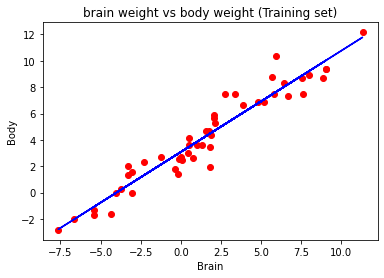

In [40]:
#2.Chart the original data and the equation on the chart.
#Training set results
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x1_train, y1_train, color = 'red')
plt.plot(x1_train, lr1.predict(x1_train), color = 'blue')
plt.title('brain weight vs body weight (Training set)')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

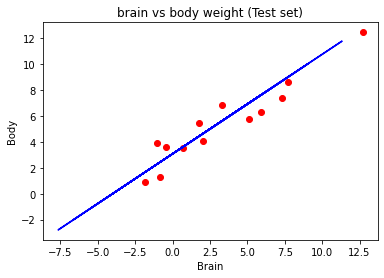

In [41]:
# Visualising the Test set results
plt.scatter(x1_test, y1_test, color = 'red')
plt.plot(x1_train, lr1.predict(x1_train), color = 'blue')
plt.title('brain vs body weight (Test set)')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [42]:
#Find the equation's  R2  score 
r_sq1= lr1.score(x1_test,y1_test)
print(r_sq1)

0.8838083775622344


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
#df3 = pd.read_fwf("salary.txt", header=None, 
                 #names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive 
drive.mount('/content/gdrive')
df3 = pd.read_fwf('gdrive/My Drive/salary.txt', header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


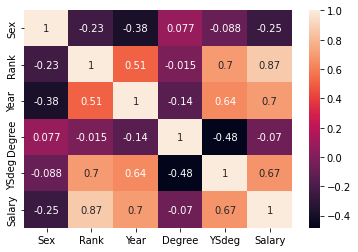

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df3.corr(),annot=True)
plt.show()

In [7]:
x7=df3.drop("Salary", axis='columns')
y7=df3["Salary"]
x7.head(2)

,Sex,Rank,Year,Degree,YSdeg
0,0,3,25,1,35
1,0,3,13,1,22


In [15]:
# split the training and testing data
from sklearn.model_selection import train_test_split
x7_train,x7_test,y7_train,y7_test=train_test_split(x7, y7, test_size=0.2, random_state=2)

In [16]:
# Model Fitting
from sklearn.linear_model import LinearRegression
lr3=LinearRegression()
lr3.fit(x7_train,y7_train)

LinearRegression()

In [17]:
#Predicting the test set results
y3_pred=lr3.predict(x7_test)
print(y3_pred)

[17140.86601256 17967.69663021 19391.50968043 17140.86601256
 17735.54399685 31546.81566866 27885.3562143  29021.64330067
 27626.72942166 22722.21363887 29392.66244878]


In [18]:
print(y7_test)

37    17095
36    18304
32    23713
39    17600
47    15350
0     36350
27    25500
1     35350
23    38045
13    23712
9     32850
Name: Salary, dtype: int64


In [19]:
diff7 = pd.DataFrame({'Actual value': y7_test, 'Predicted value': y3_pred})
diff7.head() 

,Actual value,Predicted value
37,17095,17140.866013
36,18304,17967.696630
32,23713,19391.509680
39,17600,17140.866013
47,15350,17735.543997


In [20]:
# 1.Find the linear regression equation for this data.
print("coffecient",lr3.coef_)
print("Intercept",lr3.intercept_)
# Linear regression equation is:
# y_pred= 3.083+ 0.76*x1_test

coffecient [ 1046.76530473  5766.27416903   413.39521488 -2057.18314007
  -187.35155466]
Intercept 12527.600342712582


In [22]:
#Find the equation's  R2  score 
r_sq3= lr3.score(x7_test,y7_test)
print(r_sq3)

0.7011602686502274


In [24]:
# 2.Find the selection of columns with the best  𝑅2  score.

print("Coefficients:")
list(zip(x7, lr3.coef_))

## since the coeffecient value of degree and YSdeg have is negative,we can conclude that sex, Rank, Year are the best columns  

Coefficients:


[('Sex', 1046.7653047269114),
 ('Rank', 5766.274169031024),
 ('Year', 413.39521488233277),
 ('Degree', -2057.183140066482),
 ('YSdeg', -187.3515546610181)]

In [25]:
## 3.Report whether sex is a factor in salary.
corr = df3.corr()["Salary"].sort_values(ascending=False)[1:]
corr

# -> From the resultgiven below, the correlation value between sex and salary is -0.252782
# -> Since the corrrelation between sex and salary is negative, we can conclude that sex is not a factor or a bad factor to predict the salary. 

Rank      0.867488
Year      0.700669
YSdeg     0.674854
Degree   -0.069726
Sex      -0.252782
Name: Salary, dtype: float64